In [ ]:
pip install dataprep 

In [ ]:
import numpy as np #linear algebra
import pandas as pd #csv files read
import matplotlib.pyplot as plt #visualization & EDA
import matplotlib.gridspec as gridspec 
import seaborn as sns
from matplotlib.colors import ListedColormap
from dataprep.eda import create_report, plot

#datapreprocessing & model training
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_validate  
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
cancer_data = pd.read_csv("./data.csv")
cancer_data.head()

id diagnosis  ...  fractal_dimension_worst  Unnamed: 32
0    842302         M  ...                  0.11890          NaN
1    842517         M  ...                  0.08902          NaN
2  84300903         M  ...                  0.08758          NaN
3  84348301         M  ...                  0.17300          NaN
4  84358402         M  ...                  0.07678          NaN

[5 rows x 33 columns]

In [ ]:
cancer_data.drop(['id','Unnamed: 32'],axis=1,inplace=True) #dropped 2 columns

In [ ]:
cancer_data.head()

diagnosis  radius_mean  ...  symmetry_worst  fractal_dimension_worst
0         M        17.99  ...          0.4601                  0.11890
1         M        20.57  ...          0.2750                  0.08902
2         M        19.69  ...          0.3613                  0.08758
3         M        11.42  ...          0.6638                  0.17300
4         M        20.29  ...          0.2364                  0.07678

[5 rows x 31 columns]

In [ ]:
len(cancer_data)

569


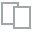
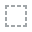
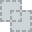
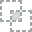
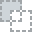
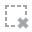
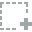
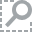
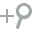
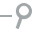
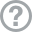
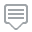
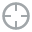
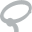
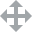
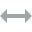
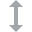
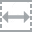
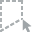
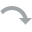
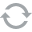
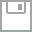
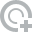
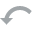
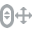
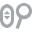
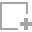
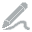
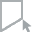
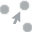
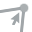
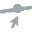

In [ ]:
plot(cancer_data)

DataPrep Report
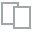
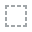
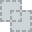
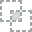
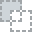
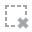
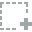
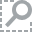
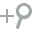
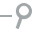
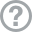
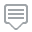
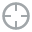
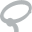
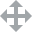
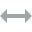
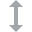
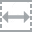
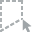
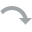
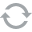
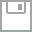
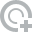
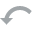
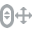
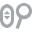
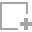
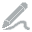
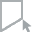
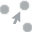
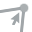
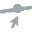

In [ ]:
create_report(cancer_data)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


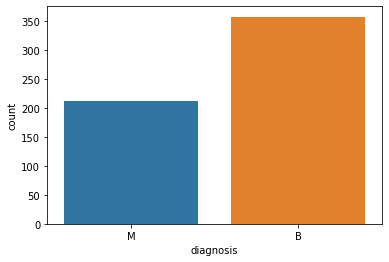

In [ ]:
sns.countplot(cancer_data['diagnosis'])

In [ ]:
#Unique values in diagnosis column
cancer_data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [ ]:
#Change output diagnosis column values into integers.
cancer_data['diagnosis'] = cancer_data['diagnosis'].map({"B":0, "M":1})

In [ ]:
cancer_data #Benign v/s Malignant

diagnosis  radius_mean  ...  symmetry_worst  fractal_dimension_worst
0            1        17.99  ...          0.4601                  0.11890
1            1        20.57  ...          0.2750                  0.08902
2            1        19.69  ...          0.3613                  0.08758
3            1        11.42  ...          0.6638                  0.17300
4            1        20.29  ...          0.2364                  0.07678
..         ...          ...  ...             ...                      ...
564          1        21.56  ...          0.2060                  0.07115
565          1        20.13  ...          0.2572                  0.06637
566          1        16.60  ...          0.2218                  0.07820
567          1        20.60  ...          0.4087                  0.12400
568          0         7.76  ...          0.2871                  0.07039

[569 rows x 31 columns]

In [ ]:
cancer_data.describe()

diagnosis  radius_mean  ...  symmetry_worst  fractal_dimension_worst
count  569.000000   569.000000  ...      569.000000               569.000000
mean     0.372583    14.127292  ...        0.290076                 0.083946
std      0.483918     3.524049  ...        0.061867                 0.018061
min      0.000000     6.981000  ...        0.156500                 0.055040
25%      0.000000    11.700000  ...        0.250400                 0.071460
50%      0.000000    13.370000  ...        0.282200                 0.080040
75%      1.000000    15.780000  ...        0.317900                 0.092080
max      1.000000    28.110000  ...        0.663800                 0.207500

[8 rows x 31 columns]

In [ ]:
cancer_data.shape

(569, 31)

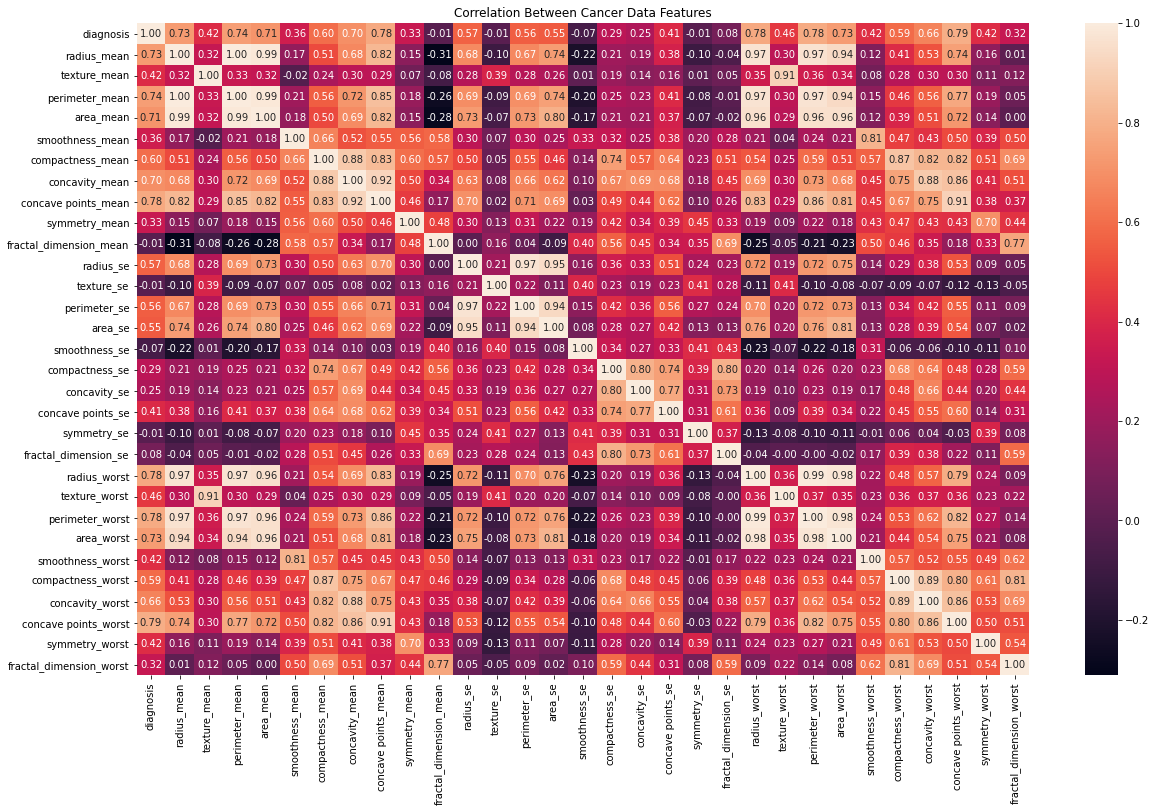

In [ ]:
plt.figure(figsize=(20,12))
plt.title("Correlation Between Cancer Data Features")
sns.heatmap(cancer_data.corr() , annot = True, fmt = ".2f")

In [ ]:
cancer_data

diagnosis  radius_mean  ...  symmetry_worst  fractal_dimension_worst
0            1        17.99  ...          0.4601                  0.11890
1            1        20.57  ...          0.2750                  0.08902
2            1        19.69  ...          0.3613                  0.08758
3            1        11.42  ...          0.6638                  0.17300
4            1        20.29  ...          0.2364                  0.07678
..         ...          ...  ...             ...                      ...
564          1        21.56  ...          0.2060                  0.07115
565          1        20.13  ...          0.2572                  0.06637
566          1        16.60  ...          0.2218                  0.07820
567          1        20.60  ...          0.4087                  0.12400
568          0         7.76  ...          0.2871                  0.07039

[569 rows x 31 columns]

In [ ]:
X = cancer_data[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean','fractal_dimension_mean',
                 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se',
                 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst','fractal_dimension_worst']]

y = cancer_data['diagnosis']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.34)

In [ ]:
decision_tree = DecisionTreeClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(decision_tree, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
dtree_fit_time = scores['fit_time'].mean()
dtree_score_time = scores['score_time'].mean()
dtree_accuracy = scores['test_accuracy'].mean()
dtree_precision = scores['test_precision_macro'].mean()
dtree_recall = scores['test_recall_macro'].mean()
dtree_f1 = scores['test_f1_weighted'].mean()
dtree_roc = scores['test_roc_auc'].mean()

In [ ]:
SVM = SVC(probability = True)

scoring = ['accuracy','precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(SVM, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
SVM_fit_time = scores['fit_time'].mean()
SVM_score_time = scores['score_time'].mean()
SVM_accuracy = scores['test_accuracy'].mean()
SVM_precision = scores['test_precision_macro'].mean()
SVM_recall = scores['test_recall_macro'].mean()
SVM_f1 = scores['test_f1_weighted'].mean()
SVM_roc = scores['test_roc_auc'].mean()

In [ ]:
LDA = LinearDiscriminantAnalysis()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(LDA, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
LDA_fit_time = scores['fit_time'].mean()
LDA_score_time = scores['score_time'].mean()
LDA_accuracy = scores['test_accuracy'].mean()
LDA_precision = scores['test_precision_macro'].mean()
LDA_recall = scores['test_recall_macro'].mean()
LDA_f1 = scores['test_f1_weighted'].mean()
LDA_roc = scores['test_roc_auc'].mean()

In [ ]:
random_forest = RandomForestClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(random_forest, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
forest_fit_time = scores['fit_time'].mean()
forest_score_time = scores['score_time'].mean()
forest_accuracy = scores['test_accuracy'].mean()
forest_precision = scores['test_precision_macro'].mean()
forest_recall = scores['test_recall_macro'].mean()
forest_f1 = scores['test_f1_weighted'].mean()
forest_roc = scores['test_roc_auc'].mean()

In [ ]:
KNN = KNeighborsClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(KNN, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
KNN_fit_time = scores['fit_time'].mean()
KNN_score_time = scores['score_time'].mean()
KNN_accuracy = scores['test_accuracy'].mean()
KNN_precision = scores['test_precision_macro'].mean()
KNN_recall = scores['test_recall_macro'].mean()
KNN_f1 = scores['test_f1_weighted'].mean()
KNN_roc = scores['test_roc_auc'].mean()

In [ ]:
bayes = GaussianNB()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(bayes, X_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
bayes_fit_time = scores['fit_time'].mean()
bayes_score_time = scores['score_time'].mean()
bayes_accuracy = scores['test_accuracy'].mean()
bayes_precision = scores['test_precision_macro'].mean()
bayes_recall = scores['test_recall_macro'].mean()
bayes_f1 = scores['test_f1_weighted'].mean()
bayes_roc = scores['test_roc_auc'].mean()

In [ ]:
models_initial = pd.DataFrame({
    'Model'       : ['Logistic Regression', 'Decision Tree', 'Support Vector Machine', 'Linear Discriminant Analysis',  'Random Forest', 'K-Nearest Neighbors', 'Bayes'],
    'Fitting time': [LR_fit_time, dtree_fit_time, SVM_fit_time, LDA_fit_time,  forest_fit_time, KNN_fit_time, bayes_fit_time],
    'Scoring time': [LR_score_time, dtree_score_time, SVM_score_time, LDA_score_time,forest_score_time, KNN_score_time, bayes_score_time],
    'Accuracy'    : [LR_accuracy, dtree_accuracy, SVM_accuracy, LDA_accuracy, forest_accuracy, KNN_accuracy, bayes_accuracy],
    'Precision'   : [LR_precision, dtree_precision, SVM_precision, LDA_precision,forest_precision, KNN_precision, bayes_precision],
    'Recall'      : [LR_recall, dtree_recall, SVM_recall, LDA_recall, forest_recall, KNN_recall, bayes_recall],
    'F1_score'    : [LR_f1, dtree_f1, SVM_f1, LDA_f1,  forest_f1, KNN_f1, bayes_f1],
    'AUC_ROC'     : [LR_roc, dtree_roc, SVM_roc, LDA_roc, forest_roc, KNN_roc, bayes_roc],
    }, columns = ['Model', 'Fitting time', 'Scoring time', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'AUC_ROC'])

models_initial.sort_values(by='Accuracy', ascending=False)

Model  Fitting time  ...  F1_score   AUC_ROC
3  Linear Discriminant Analysis      0.007438  ...  0.950536  0.987419
4                 Random Forest      0.190775  ...  0.951498  0.985593
6                         Bayes      0.002160  ...  0.937837  0.985917
5           K-Nearest Neighbors      0.002962  ...  0.934543  0.948133
0           Logistic Regression      0.051054  ...  0.932691  0.988312
2        Support Vector Machine      0.017784  ...  0.908161  0.967045
1                 Decision Tree      0.006898  ...  0.900279  0.896077

[7 rows x 8 columns]